<div style="border:solid lightblue 3px; background:#f7faf8; padding: 20px">
<b>Привет!</b>

Меня зовут Владимир, и я буду проверять твой проект. Предлагаю общаться на «ты», но если это не совсем удобно для тебя — дай знать, и мы перейдем на "вы". Моя цель не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь улучшить навыки. 
    
Пожалуйста, не перемещай, не удаляй и не правь мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.

При проверке работы я буду отмечать комментарии цветом и примечанием. В конце заголовка комментария указан номер итерации проверки.

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Комментарии такого цвета нужно исправить, иначе проект не будет принят. 
</div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Такой комментарий является рекомендацией или советом. Mожешь учесть их при выполнении задания.
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Так выделены все остальные комментарии, включая позитивные моменты, пояснения и рассуждения.
</div>  
    
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте — пиши об этом в комментариях, например, с помощью такого кода в markdown ячейке:

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Ок.   

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Владимир, привет! Очень приятно. Конечно, давай на "ты".

Спасибо большое за ценные советы и рекомендации!

**Проект: статистический анализ данных.\
Краткое описание задачи - на основе предоставленных датасетов о поездках и клиентах сервиса по кикшерингу произвести исследование и предобработку данных для проверки нескольких гипотез по развитию бизнеса**

На входе имеем 3 набора данных:\
users_go.csv - данные по пользователям\
rides_go.csv - данные по поездкам\
subscriptions_go.csv - данные по подпискам

Основные блоки работ:

1) Загрузка необходимых библиотек\
2) Загрузка, проверка и предобработка данных\
3) Исследование данных, формирование основных инсайдов\
4) Создание аггрегированной таблицы для расчёта и формирования выводов по доходам\
5) Работа с гипотезами

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Есть вступление. Оно обязательно должно быть в работе. Но еще можно добавить план работы

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Да, явно не будет лишним, дополняю:

Основные блоки работ:
1) Загрузка необходимых библиотек\
2) Загрузка, проверка и предобработка данных\
3) Исследование данных, формирование основных инсайдов\
4) Создание аггрегированной таблицы для расчёта и формирования выводов по доходам\
5) Работа с гипотезами

**0. Импортируем библиотеки, которые могут понадобиться в работе:**

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from scipy import stats as st
from scipy.stats import binom, poisson

In [4]:
import seaborn as sns

In [5]:
import numpy as np

In [6]:
from math import sqrt, factorial

#### Шаг 1. Загрузка данных

1.1. Загружаем наши данные в соответствующие датасеты:\
*users - данные по пользователям\
*rides - данные по поездкам\
*subscriptions - данные по подпискам

In [7]:
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

1.2. Данные загружены, теперь ознакомимся с общей информацией по датасетам и взглянем на некоторые строки.

1.2.1. Начнем с users:

In [8]:
display(users.head())
users.info()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


*Вывод по users:*
1) данные без пропусков\
2) тип данных для каждого поля корректен\
3) каких-либо доработок датафрейма не требуется

1.2.2. Теперь взглянем на rides:

In [9]:
display(rides.head())
rides.info()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


*Вывод по rides*\
В целом здесь также нет явных проблем с данными, но в дальнейшем следует изменить тип данных поля date с object на datetime.

1.2.3. Завершаем ознакомление датасетом subscriptions

In [10]:
display(subscriptions.head())
subscriptions.info()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


*Вывод по subscriptions*\
В таблице всего 2 строки, содержащие параметры подписок, никаких доп. действий здесь не требуется.

*Общий вывод по этапу "Загрузка данных":*\
В целом на данном этапе нет нареканий по составу данных в перечисленных датафреймах (кроме типа данных поля date в rides)

#### Шаг 2. Предобработка данных

2.1. Первым делом, приведем столбец date в соответсвующий тип:

In [11]:
rides['date'] = pd.to_datetime(rides['date'])
rides.info()
display(rides.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


Для перепроверки вызвали методы info и head - видим, что тип данных изменен на корректный.

2.2. Добавим дополнительный столбец month в rides:

In [12]:
rides['month'] = rides['date'].dt.month
display(rides.head())

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Выводим первые 5 записей и видим, что номер месяца добавлен корректно.

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Желательно еще проверить, за какой период имеются данные. Создается столбец с номерами месяцев, если здесь несколько лет, следует это учитывать.

In [13]:
display(rides['date'].describe())

/tmp/ipykernel_351/1196740397.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(rides['date'].describe())


count                   18068
unique                    364
top       2021-12-22 00:00:00
freq                       72
first     2021-01-01 00:00:00
last      2021-12-30 00:00:00
Name: date, dtype: object

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Действительно, годы могут быть разные и добавленные месяцы в этом случае нельзя воспринимать корректно.
Выше дополнительно воспользовался методом describe() к столцу rides['date'], который показал, что данные у нас с 01.01.21 по 30.12.2022, кол-во уникальных значений - 364, что укладывается в обозначенный период.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ Также можно проверить через поиск минимального и максимального значения или так:
    
    датафрейм['date'].dt.year.unique()    

2.3. На этапе загрузки данных увидели, что пропущенные значения в датафреймах отсутствуют, но на всякий случай проверим повторно.

In [14]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [15]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

Пропущенные значения не обнаружены.

2.4. Проверка на дубликаты

In [16]:
users.duplicated().sum()

31

In [17]:
rides.duplicated().sum()

0

Здесь видим, что в датафрейме users найден 31 дубликат - необходимо произвести их удаление.

In [18]:
users = users.drop_duplicates()
display(users.duplicated().sum())
users.info()

0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


После удаления дубликатов, убеждаемся, что они действительно отсутствуют.

На всякий случай, отдельно хочется проверить наличие дубликатов в users['user_id']

In [19]:
users['user_id'].duplicated().sum()

0

*Общий вывод по этапу "Предобработка данных"*\
В данной задаче, этап предобработки данных оказался не обширным:
1. Был изменен тип данных в rides['date']
2. Были удалены дубликаты в users\
Других необходимых изменений в датафреймах пока не наблюдается.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Хорошо, проверены и удалены выявленные дубликаты.

#### Шаг 3. Исследовательский анализ данных

3.1. Взглянем на наших пользователей в разрезе городов:

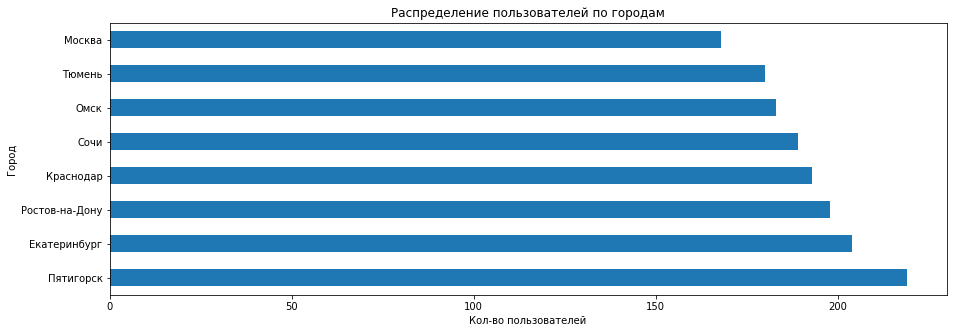

city
Москва            168
Тюмень            180
Омск              183
Сочи              189
Краснодар         193
Ростов-на-Дону    198
Екатеринбург      204
Пятигорск         219
Name: user_id, dtype: int64

In [20]:
(users.groupby('city')['user_id'].count().
 sort_values(ascending = False).
 plot(kind = 'barh', figsize = (15, 5)))
plt.title('Распределение пользователей по городам')
plt.ylabel('Город')
plt.xlabel('Кол-во пользователей')
plt.show()

display(users.groupby('city')['user_id'].count().sort_values())

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Для большего удобства при считывании визуализации лучше использовать линейчатую диаграмму (столбчатую диаграмму с горизонтальными столбцами), т.е. повернуть ее на 90 градусов. Это позволит расположить названия городов горизонтально. Таблицу стоит оставить и/или добавить количественные значения на график
  
Также советую сортировать значения, так их проще анализировать.

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Также необходимо добавить числовые значения по городам на графике либо отдельно в таблице. 

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Вывел отдельно табличку со значениями

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Не хватает заголовка и подписей на осях. Это замечание актуально для всех визуализаций в этом проекте.

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Замечания учтены во всех визуализациях

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ +

Из гистограммы видно, что пользователи распредлены по городам относительно равномерно, без резких выбросов.
Дополнительно можно рассмотреть распределение с помощью метода describe(), где также можно увидеть, что нет как явных выбросов, так и широко разброса данных.

In [21]:
users.groupby('city')['user_id'].count().describe()

count      8.000000
mean     191.750000
std       15.672998
min      168.000000
25%      182.250000
50%      191.000000
75%      199.500000
max      219.000000
Name: user_id, dtype: float64

3.2. Теперь посмотрим на наличие подписки у пользователей:

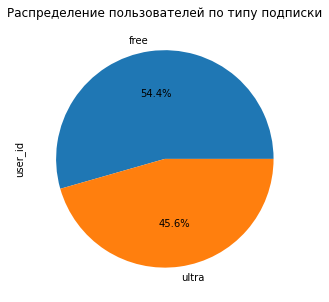

In [22]:
(users.groupby('subscription_type')['user_id'].count().
 plot(kind = 'pie', figsize = (5, 5), autopct='%1.1f%%'))
plt.title('Распределение пользователей по типу подписки')

plt.show()

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Здесь подошла бы круговая диаграмма, с ее помощью можно показать соотношение двух категорий в процентах. О том, как подписывать диаграмму, есть в документации по [ссылке](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html)

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Либо на круговой диаграмме, либо в таблице, либо на указанном графике необходимо добавить подписи в виде процентов/долей, т.к. нужно показать соотношение. 

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Да, круговая диаграмма выглядит здесь куда органичнее и информативнее.
Теперь видно, что подписки распространены в соотношении примерно 45/55 в пользу free.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ Хорошо

Здесь мы можем наблюдать, что около 40% пользователей имеют подписку ultra.

3.3. Изучим возраст наших пользователей:

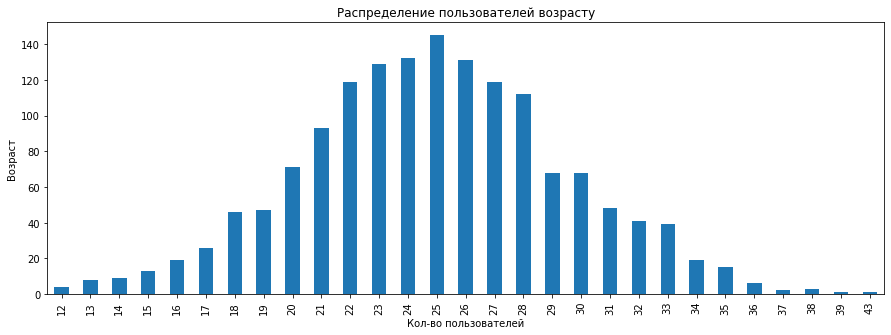

In [23]:
(users.groupby('age')['user_id'].count().
 plot(kind = 'bar', figsize = (15, 5)))
plt.title('Распределение пользователей возрасту')
plt.ylabel('Возраст')
plt.xlabel('Кол-во пользователей')
plt.show()

In [24]:
display(users['age'].describe())

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Не лишним было бы подробнее изучить данные с использованием функции `describe()`. С ее помощью можно увидеть точное минимальное и максимальное значения, определить медиану и среднее, в качестве диапазона часто встречающихся значений для выводов можно выбрать данные от первого до третьего квартиля (25% и 75%). Рекомендация актуальна и для других пунктов (ниже) данного шага.

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Дополнил анализ функцией describe(), можно обратить внимание, что среднее и медиана практически одинаковы, а первый и третий квартили, с учетом "усов", охватывают практически весь набор данных. 
    
В остальных случаях также добавил describe для оценки.

По гистограмме можно увидеть, что возраст пользователей - от 12 до 43 лет, наибольшее количество пользователей при этом в возрасте от 18 до 33 лет.

3.4. Попробуем оценить среднее расстояние, которое преодолевается пользователем за 1 поездку:

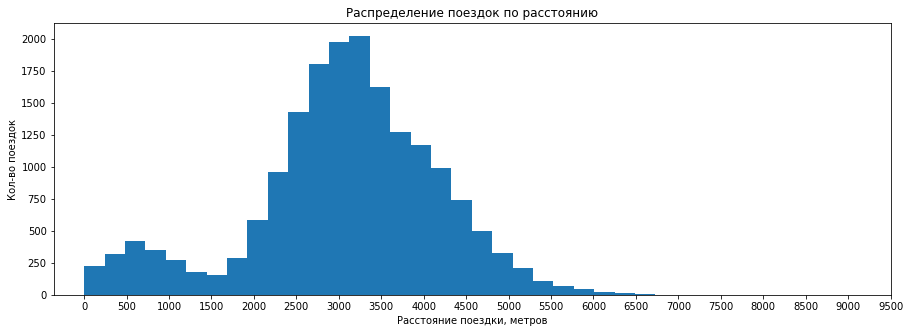

In [25]:
(rides['distance'].
 plot(kind = 'hist', bins = 30, figsize = (15, 5)))
plt.xticks(np.arange(0, 10000, 500))
plt.title('Распределение поездок по расстоянию')
plt.ylabel('Кол-во поездок')
plt.xlabel('Расстояние поездки, метров')

plt.show()

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ График лучше построить не на агрегированных данных, т.к. на гистограмме на исходных данных можно сделать интересные наблюдения. В частности, можно обратить внимание на пик слева. О чем он говорит? 
    
Это замечание касается и пункта 4.5

In [26]:
display(rides['distance'].describe())

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Поправил гистограммы, и по расстоянию, и по продолжительности. Действительно, проявились некоторый "пики" в левой части, на ум приходит то, что у пользователи с подпиской ultra часто грешат поездками на очень короткие расстояния (учитывая бесплатный старт + более низкая стоимость минуты) и в целом чаще ездят на самокатах.
    
UPD - далее есть подобное распределение между разными подписками, этот пик присутствует в обоих типах. Новая гипотеза - пользователи берут самокат поблизости, но с низким уровнем заряда, чтобы доехать до самоката с более высоким уровнем заряда и пересесть на него.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ +

Здесь можно сделать вывод, что наиболее часто самокат используется для поездок на расстояние 2500-3500 м.

3.5. А также, поробуем оценить продолжительность поездки:

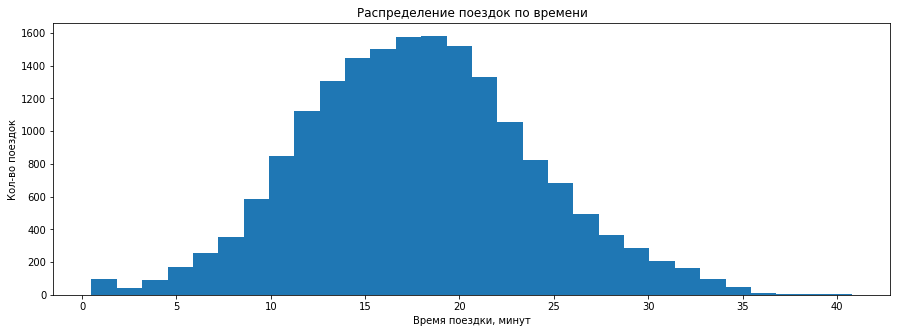

In [27]:
(rides['duration'].
 plot(kind = 'hist', bins = 30, figsize = (15, 5)))
plt.title('Распределение поездок по времени')
plt.ylabel('Кол-во поездок')
plt.xlabel('Время поездки, минут')

plt.show()

Что можно сказать по среднему времени поездок - в большинстве, поездка занимает в среднем 15-20 минут, что в целом сходится с наиболее популярным расстоянием поездки из предыдущей гистограммы.

In [28]:
display(rides['duration'].describe())

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Дополнительно можно посмотреть, есть ли в столбце с продолжительностью сессии аномалии. Можно сравнить продолжительность сессий (выбрав только короткие) и расстояние поездок и прокомментировать, насколько реально можно проехать такое расстояние за указанное время. В случае обнаружения удалять не рекомендуется, т.к. повлияет на выручку

In [29]:
display(rides[rides['duration'] < 2])
display(rides[rides['duration'] < 2]['distance'].describe())
display(rides[rides['duration'] < 2]['duration'].describe())

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


count      95.000000
mean     5113.176549
std       658.254104
min      4030.308008
25%      4611.510820
50%      5052.769411
75%      5488.459099
max      7211.007745
Name: distance, dtype: float64

count    95.0
mean      0.5
std       0.0
min       0.5
25%       0.5
50%       0.5
75%       0.5
max       0.5
Name: duration, dtype: float64

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Да, если поближе рассмотреть короткие поездки (взял менее 2-х минут для примера), становится очевидно, что со временем поездки что-то не так: таких записей 95, у всех время поездки 0,5, но расстояния - от 4 тыс. м. до 7,2 тыс. м., с медианой 5052.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ Хорошо, выявлены аномальные значения

*Общий вывод по этапу "Исследовательский анализ"*\
Изучив основные параметры, можно сделать следующие выводы:
1. Распрелеление пользователей по городам выглядит равномерно, при том, что пользователей из Москвы наименьшее кол-во, что обращает на себя внимание, учитывая население представленных городов. Глобально кажется, что выборка здесь должна быть побольше.
2. Около 40% пользователей имеют подписку ultra.
3. Большинство пользователей сервиса в возрасте от 18 до 33 лет.
4. Наиболее популярное расстояние для поездок - 2500-3500 м.
5. Основная часть поездок занимает 15-20 минут.

#### Шаг 4. Объединение данных

4.1. Сначала объеденим данные из 3-х датафремов users. rides и subscriptions в 1 датафрейм под названием urs:

In [30]:
urs = rides.merge(users, on = 'user_id')
urs = urs.merge(subscriptions, on = 'subscription_type')
urs['duration'] = np.ceil(urs['duration'])
display(urs.info(), urs.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   month              18068 non-null  int64         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


None

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,26.0,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,16.0,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,7.0,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,19.0,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,27.0,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


Проверка стандартными инструментами показывает, что данные сели корректно, без потерь.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ После объединения важно проверять, что количество записей совпадает и не появились пропуски

4.2. Теперь выведем из urs отдельные датафреймы, в одном из которых будут содержаться данные по пользователям с подпиской (urson), а в другом - без подписки (ursoff):

In [31]:
urson = urs[urs['subscription_type'] == 'ultra']
ursoff = urs[urs['subscription_type'] == 'free']
display(len(urson['subscription_type']), urson['subscription_type'].unique())
display(len(ursoff['subscription_type']), ursoff['subscription_type'].unique())

6500

array(['ultra'], dtype=object)

11568

array(['free'], dtype=object)

С помощью небольшой проверки подтверждаем, что данные поделены корректно.
Интересная деталь - пользователей с подпиской ultra заметно меньше, но поездок у них намного больше, чем поездок free.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Отлично, созданы необходимые датафреймы. Я бы еще соватовал проверять, что совокупный размер датафреймов совпадает с количеством строк в исходной таблице.

4.3. Теперь взглянем на расстояние и время поездок в разрезе пользователей с подпиской и без подписки:

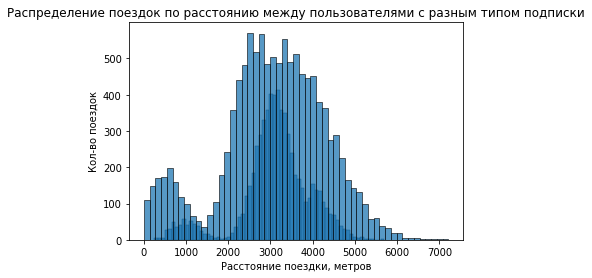

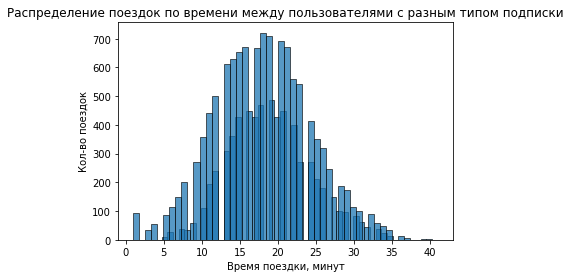

In [32]:
sns.histplot(data = urson['distance'])
sns.histplot(data = ursoff['distance'])
plt.title('Распределение поездок по расстоянию между пользователями с разным типом подписки')
plt.ylabel('Кол-во поездок')
plt.xlabel('Расстояние поездки, метров')
plt.show()

sns.histplot(data = urson['duration'])
sns.histplot(data = ursoff['duration'])
plt.title('Распределение поездок по времени между пользователями с разным типом подписки')
plt.ylabel('Кол-во поездок')
plt.xlabel('Время поездки, минут')
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Хорошее решение объединить два графика для сравнения профилей пользователей

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Также рекомендуется использовать функцию `describe()` на этом шаге. В частности, как различается среднее и медиана?

In [33]:
display(urson['distance'].describe())
display(len(urson[urson['distance'] < 500]) / (len(urson['distance'])))
display(ursoff['distance'].describe())
display(len(ursoff[ursoff['distance'] < 500]) / (len(ursoff['distance'])))

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

0.002307692307692308

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

0.04728561549100968

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Взглянув более детально на дистанцию у двух групп, примечательно, что медиана у них практически одинаковая, но разброс значений явно шире у группы free (ursoff). Здесь можно предположить, что коротких поездок больше у группы free. Также, путем нехитрых расчётов выясняем, что доля поездок менее 500 метров у пользователей free вдвое выше, чем у ultra (0.47% vs 0.23%)

In [34]:
display(urson['duration'].describe())
display(ursoff['duration'].describe())

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

По времени поездки у free и ultra - картина схода с расстоянием, медианы у обоих групп отличаются незначительно, кроме этого, можно обратить внимание, что у обеих групп медиана практически соответствует среднему значению. Разница в стандартном отклонении во времени поездок между группами здесь менее значительна, чем в расстоянии, особенно, если учесть, что в группе ultra ряд значений имеют некорректное время поездки.

Взглянув на расстояние и продолжительность поездок пользователей с подпиской и без подписки можно сделать вывод, что распределение значений по данным параметрам практически идентичное.

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Что касается дистанции, у каких пользователей бОльший диапазон расстояния поездок и чаще встречаются короткие поездки (до 500 м)? 
    
По длительности у каких пользователей чуть бОльший разброс (на графике или сравнить стандартное отклонение)?
    
Можно ли сказать, что графики сильно различаются друг от друга?

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

В целом, разброс больше в группе free, но и записей в этой группе почти вдвое больше, чем в ultra.
В группе free выше стандартное отклонение и по расстоянию поездки, и по времени.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ Принято

*Общий вывод по этапу "Объединение данных"*\
По итогам данного этапа датафреймы были объеденены в 1 общий, а также выведены 2 отдельных датафрейма для разных типов подписки.
Сравнив параметры поездок пользователей с подпиской и без подписки, можно сделать вывод, что расстояние и продолжительность поездок у обеих групп не имеют явных отличий.

#### Шаг 5. Подсчёт выручки

5.1. На основе датафрейма urs создадим новую таблицу (urs_agg) с суммарным расстоянием, количеством и временем поездок для каждого пользователя, за каждый месяц:

In [35]:
urs_agg = urs.pivot_table(index = ('month', 'user_id'), values = ('distance', 'duration'), aggfunc = ('sum', 'count'))
display(urs_agg.head())
urs_agg.columns = urs_agg.columns.map('_'.join)
urs_agg = urs_agg.drop('duration_count', axis = 1)
urs_agg = urs_agg.rename(columns={'distance_count': 'rides_count'})
urs_agg = urs_agg.reset_index(drop = False)
display(urs_agg.head())
display(urs_agg.info())

distance              duration      
                 count          sum    count   sum
month user_id                                     
1     1              2  7027.511294        2  42.0
      3              1  3061.777147        1  13.0
      5              1  3914.646990        1  13.0
      7              2  6478.080979        2  28.0
      12             1  3577.151148        1  33.0

,month,user_id,rides_count,distance_sum,duration_sum
0,1,1,2,7027.511294,42.0
1,1,3,1,3061.777147,13.0
2,1,5,1,3914.646990,13.0
3,1,7,2,6478.080979,28.0
4,1,12,1,3577.151148,33.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11331 entries, 0 to 11330
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         11331 non-null  int64  
 1   user_id       11331 non-null  int64  
 2   rides_count   11331 non-null  int64  
 3   distance_sum  11331 non-null  float64
 4   duration_sum  11331 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 442.7 KB


None

5.2. Добавим в urs_agg новый столбец с информацией о выручке по каждому пользователю, за каждый месяц:

In [36]:
urs_agg = urs_agg.merge(users, on = 'user_id')

In [37]:
urs_agg = urs_agg.merge(subscriptions, on = 'subscription_type')

In [38]:
urs_agg['income'] = (urs_agg['rides_count'] * urs_agg['start_ride_price'] +
                     urs_agg['duration_sum'] * urs_agg['minute_price'] +
                     urs_agg['subscription_fee'])
urs_agg.head()

,month,user_id,rides_count,distance_sum,duration_sum,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,income
0,1,1,2,7027.511294,42.0,Кира,22,Тюмень,ultra,6,0,199,451.0
1,4,1,1,754.159807,7.0,Кира,22,Тюмень,ultra,6,0,199,241.0
2,8,1,2,6723.470560,46.0,Кира,22,Тюмень,ultra,6,0,199,475.0
3,10,1,2,5809.911100,32.0,Кира,22,Тюмень,ultra,6,0,199,391.0
4,11,1,3,7003.499363,56.0,Кира,22,Тюмень,ultra,6,0,199,535.0


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Всё верно. Выручка рассчитана корректно

*Общий вывод по этапу "Подсчет выручки"*\
Подведем итог, что было сделано на данном этапе:
1. Создана новая таблица urs_agg, с аггрегированными данными по пользователям в разрезе месяцев.
2. На основе urs_agg была рассчитана выручка по каждому пользователю в разрезе месяцев, добавлен столбец income.


#### Шаг 6. Проверка гипотез

6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

В данном случае, мы имеем дело с односторонней гипотезой: пользователи с подпиской больше времени тратят на поездки.
Для проверки гипотезы, выведем среднее время поездок без подписки, и далее сравним его со временем поездок пользователей с подпиской.

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Формулировки гипотез:\
1-я пара:\
H0: пользователи ultra тратят на поездки то же время, как и пользователи free.\
H1: пользователи ultra тратят больше времени на поездки, чем пользователи free
    
2-я пара:\
H0: пользователи ultra тратят на поездки то же время, как и пользователи free.\
H1: пользователи ultra тратят меньше времени на поездки, чем пользователи free

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"></h2>
    
❌ В нулевой должно быть "равно". Формулировки "меньше либо равно" нет в задании

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_2: <a class="tocSkip"> </h2>

Я почему-то думал, что в нулевой гипотезе обязательно должно быть равенство, при этом включая меньше-больше или равно. Гипотезу поправил в первом комментарии. Значит, в данном случае потребуется две пары гипотез, если я мыслю верно.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_3: <a class="tocSkip"> </h2>
    
✅ В данном случае равно, но в других кейсах может быть меньше или равно. Например, в п. 6.2

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Здесь должна быть сформулирована нулевая и альтернативная гипотеза. Это же замечание касается и других пунктов данного раздела. О гипотезах есть в уроке "Формулирование гипотез" в теме "Проверка гипотез" раздела "Статистический анализ данных". Формулировки гипотез должны быть полными.

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_2: <a class="tocSkip"> </h2>

Поразмыслив, приходит на ум, что здесь нам нужно поработать с гипотезой о равенстве средних двух величин ген. совокупности, пробуем:

In [39]:
# Проверяем 1-ю пару гипотез
free_duration = urs[urs['subscription_type'] == 'free']['duration']
ultra_duration = urs[urs['subscription_type'] == 'ultra']['duration']
alpha = 0.05

results = st.ttest_ind(
    ultra_duration, 
    free_duration,
      alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 


p-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


In [40]:
# Проверяем 2-ю пару гипотез
free_duration = urs[urs['subscription_type'] == 'free']['duration']
ultra_duration = urs[urs['subscription_type'] == 'ultra']['duration']
alpha = 0.05

results = st.ttest_ind(
    ultra_duration, 
    free_duration,
      alternative='less')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 


p-значение: 1.0
Не отвергаем нулевую гипотезу


<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ "Важно понять, тратят ли пользователи с подпиской больше времени на поездки" - как именно должна быть сформулирована альтернативная гипотеза? Необходимо добавить соответствующий аргумент в параметр alternative

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Здесь вроде поправил, в итоге H0 отвергается

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"></h2>
    
❌ Одно агрегированное число сравнивать не совсем верно. Выборки должны быть схожие

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_2: <a class="tocSkip"> </h2>

Итого попробовал проверить две пары гипотез методом st.ttest_ind(), получается следующее:\
1-я пара:\
H0: пользователи ultra тратят на поездки то же время, как и пользователи free - **отвергнута**\
H1: пользователи ultra тратят больше времени на поездки, чем пользователи free
    
2-я пара:\
H0: пользователи ultra тратят на поездки то же время, как и пользователи free - **не отвергнута**\
H1: пользователи ultra тратят меньше времени на поездки, чем пользователи free
    
**Следовательно, итог здесь выходит в пользу того, что в пользователи ultra тратят все же больше времени на поездки, нежели free.**

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_3: <a class="tocSkip"> </h2>
    
⚠️ Лучше написать менее категорично: "Нулевая гипотеза (о чем?) отвергнута, есть основания утверждать, что...". Мы можем с определенной долей вероятности допустить, что скорее всего верна соответствующая гипотеза.

6.2 Расстояние одной поездки в 
3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 
3130 метров? Проверьте гипотезу и сделайте выводы.

Здесь можем применить одностроннюю гипотезу - расстояние 1 поездки пользователей ultra менее 3130 м.

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Формулировки гипотез:\
H0: пользователи ultra равное 3130 м. расстояние за поездку\
H1: пользователи ultra проезжают более 3130 м. за поездку.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ +

In [41]:
target_distance = 3130
ultra_distance = urs[urs['subscription_type'] == 'ultra']['distance'] 
alpha = 0.05

results_ud = st.ttest_1samp(
    ultra_distance, 
    target_distance,
      alternative='greater')

print('p-значение:', results_ud.pvalue)

if (results_ud.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Результат верный

В данном случае видим, что очень высока вероятность поездки с расстоянием менее 3130 м, следовательно, гипотеза не отвергается.

6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Насолько я понял, здесь речь о суммарной выручке в разрезе типа подписки и месяцев:

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Формулировки гипотез:\
H0: выручка от пользователей ultra равна выручке от пользователей free\
H1: выручка от пользователей ultra больше, чем выручка от пользователей free

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"></h2>
    
❌ Аналогично п. 6.1

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_3: <a class="tocSkip"> </h2>
    
✅ +

In [42]:
income_free_per_month = urs_agg[urs_agg['subscription_type'] == 'free']['income']
income_ultra_per_month = urs_agg[urs_agg['subscription_type'] == 'ultra']['income']

alpha = 0.05

results_in = st.ttest_ind(income_ultra_per_month, income_free_per_month, alternative='greater')

print('p-значение:', results_in.pvalue)

if (results_in.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Необходимо проверить гипотезу, используя метод ttest_ind() (урок "Гипотеза о равенстве средних двух генеральных совокупностей"). Также нужно скорректировать аргумент в alternative - "проверьте гипотезу о том, что выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки".
    
Сравнивается здесь именно среднее, а не сумма, т.е. ничего агрегировать не нужно. Стоит только отфильтровать выборки по ultra и free.

In [43]:
display(income_free_per_month.describe())
display(income_ultra_per_month.describe())

count    6798.000000
mean      328.641365
std       183.868330
min        58.000000
25%       194.000000
50%       274.000000
75%       428.000000
max      1444.000000
Name: income, dtype: float64

count    4533.000000
mean      362.792191
std        88.262737
min       223.000000
25%       301.000000
50%       337.000000
75%       409.000000
max       955.000000
Name: income, dtype: float64

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

С помощью метода ttest_ind() пришел к выводу, что H0 не отвергнута, т.е. доход от пользователей ultra не является более высоким, чем от пользователей free.

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"></h2>
    
❌ Порядок выборок должен быть такой же, как в альтернативной гипотезе. Например, выборка 1 больше выборки 2. Значит, в тесте сначала указывается выборка 1, затем выборка 2 и аргумент 'greater' в alternative

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_2: <a class="tocSkip"> </h2>

Поправил порядок, намечается вывод, обратный предыдущему, пользователи ultra являются более доходными, чем пользователи free, т.к. гипотеза.
    
Чтобы убедиться в этом дополнительно, воспользовался методом describe() и, действительно, медиана и среднее говорит о том, что ultra все же более доходная категория.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_3: <a class="tocSkip"> </h2>
    
✅ Хорошо

Здесь можно сделать вывод, что суммарная выручка с наибольшей долей вероятности будет выше по пользователям с подпиской free.

6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

-В данном случае должен помочь двухвыборочный t-тест для зависимых выборок

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Подходит тест st.ttest_rel(). Но в задании еще написано: "Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось". Какая должна быть гипотеза, односторонняя или двухсторонняя?

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Если не ошибаюсь, здесь имеет место быть одностронняя гипотеза, где:\
H0 = Кол-во обращений после обновления равно кол-ву обращений до обновления;\
H1 = Кол-во обращений после обновления меньше, чем до обновления.

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
⚠️ Постановки задачи о том, что "больше или равно", не было.

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_2: <a class="tocSkip"> </h2>

Да, поправил на "равно"

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_3: <a class="tocSkip"> </h2>
    
✅ +

*Общий вывод по этапу "Проверка гипотез"*

1) по итогам расчетов, не была отвергнута гипотеза о большей трате вреиени на поездки пользователями ultra. Здесь с достаточной уверенностью можно предположить, что данная категория пользователей будет тратить больше времени на поездки.

2) также, не была отвергнута гипотеза о том, что расстояние поездок пользователей с подпиской ultra обычно менее 3130 м. По аналогии с предыдущим пунктом можно предположить, что расстояние поездок в основном будет укладываться до 3130 м.

3) проверяя гипотезу о большей помесячной выручке от пользователей ultra, по итогам расчётов, пришли к тому, что гипотеза отвергается - пользователи ultra в основном приносят меньше выручки.

#### Шаг 7. Распределения

7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

In [44]:
n = 1170
p = 0.1

mu = n * p
sigma = sqrt(n * p * (1 - p))
distr = st.norm(mu, sigma) 

result = 1 - distr.cdf(100)
display(result)


0.9512064034722397

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Лучше рассчитать с помощью цикла. Выбрать какое-нибудь количество промокодов (n) и увеличивать его на единицу, пока binom.cdf не станет равным или меньше 0.05 (в аргументах функции cdf стоит указать 99, n и p). 
    
Для графика распределения в plot() на оси X задать количество успехов, на оси Y - вероятность с помощью функции pmf с такими аргументами, как количество успехов, количество промокодов и вероятность успеха.

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Да, эту часть явно стоит повторить еще разок-другой, пока сложновато

Здесь методом подбора удалось найти значение, при котором вероятность выполнить план будет примерно равна 95%. Для этого отделу маркетинга будет необходимо разослать 1170 промокодов. С графиком распределения появилась сложность, ибо здесь большое значение n, либо я чего-то недопонял

7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

пропускаю задачу, по распределениям в целом нужно пройтись еще разок.

**Общий итог задачи**

1. Были загружены и проверены на пропуски, типы данных и дубликаты данные из 3-х таблиц: users, rides и subscriptuons.
2. В части предобработки был изменен тип данных в rides['date'], а также были удалены дубликаты в users.
3. По исследовательской части можно сделать следующие выводы:\
   3.1. Распрелеление пользователей по городам выглядит равномерно, при том, что пользователей из Москвы наименьшее кол-во, что обращает на себя внимание, учитывая население представленных городов. Глобально кажется, что выборка здесь должна быть побольше.\
   3.2. Около 40% пользователей имеют подписку ultra.\
   3.3. Большинство пользователей сервиса в возрасте от 18 до 33 лет.\
   3.4. Наиболее популярное расстояние для поездок - 2500-3500 м.\
   3.5. Основная часть поездок занимает 15-20 минут.\
4. На этапе Объединение данных датафреймы users, rides и subscriptions были объеденены в 1 общий - urs, а также выведены 2 отдельных датафрейма для разных типов подписки: urson и ursoff.
Сравнив параметры поездок пользователей с подпиской и без подписки, можно сделать вывод, что расстояние и продолжительность поездок у обеих групп не имеют явных отличий
5. Подсчет выручки: здесь создана новая таблица urs_agg, с аггрегированными данными по пользователям в разрезе месяцев. На основе urs_agg была рассчитана выручка по каждому пользователю в разрезе месяцев, добавлен столбец income.
6. Проверка гипотез:\
   6.1. По итогам расчетов, не была отвергнута гипотеза о большей трате вреиени на поездки пользователями ultra. Здесь с достаточной уверенностью можно предположить, что данная категория пользователей будет тратить больше времени на поездки.\
   6.2. также, не была отвергнута гипотеза о том, что расстояние поездок пользователей с подпиской ultra обычно менее 3130 м. По аналогии с предыдущим пунктом можно предположить, что расстояние поездок в основном будет укладываться до 3130 м.\
   6.3. проверяя гипотезу о большей помесячной выручке от пользователей ultra, по итогам расчётов, пришли к тому, что гипотеза отвергается - пользователи ultra в основном приносят меньше выручки.


<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Вывод нужно будет обновить после внесения изменений в проекте. Также стоит резюмировать, какие пользователи - с подпиской или без подписки - являются более выгодными для сервиса аренды самокатов.

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"></h2>
    
❌ Вывод нужно будет перепроверить

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_2: <a class="tocSkip"> </h2>

Вывод ниже поправил в соответствии с новымы итогами проверки гипотез.

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Обновленный общий вывод:
    
1. Были загружены и проверены на пропуски, типы данных и дубликаты данные из 3-х таблиц: users, rides и subscriptuons.
    
    
2. В части предобработки был изменен тип данных в rides['date'], а также были удалены дубликаты в users.
    
    
3. По исследовательской части можно сделать следующие выводы:\
   3.1. Распрелеление пользователей по городам выглядит равномерно, при том, что пользователей из Москвы наименьшее кол-во, что обращает на себя внимание, учитывая население представленных городов. Глобально кажется, что выборка здесь должна быть побольше.\
   3.2. Около 45% пользователей имеют подписку ultra.\
   3.3. Большинство пользователей сервиса в возрасте от 18 до 33 лет, при медиане 25 лет. Распределение в данном случае достаточно равномерное, без явных выбросов\
   3.4. Наиболее популярное расстояние для поездок - 2500-3800 м. При этом, на графике распределения можно увидеть небольшой пик в левой части - вероятно, здесь отражены ситуации, когда пользователь берет ближайший самокат с низким уровнем заряда, чтобы доехать до самоката с заряженным аккумулятором.\
   3.5. Основная часть поездок занимает 15-20 минут. Есть также небольшой пик в левой части, при подробном рассмотрении которого становится очевидно, что имеется ошибка в данных - 95 записей со временем поездки 0.5, при расстояниях в несколько тысяч метров.\
 
    
4. На этапе Объединение данных датафреймы users, rides и subscriptions были объеденены в 1 общий - urs, а также выведены 2 отдельных датафрейма для разных типов подписки: urson и ursoff.
    
    Сравнив параметры поездок пользователей с подпиской и без подписки, можно сделать вывод, что расстояние и продолжительность поездок у обеих групп не имеют явных отличий.
    
    Взглянув более детально на дистанцию у двух групп, примечательно, что медиана у них практически одинаковая, но разброс значений явно шире у группы free (ursoff). Здесь можно предположить, что коротких поездок больше у группы free. Также, путем нехитрых расчётов выясняем, что доля поездок менее 500 метров у пользователей free вдвое выше, чем у ultra (0.47% vs 0.23%)
    
    По времени поездки у free и ultra - картина схожа с расстоянием, медианы у обоих групп отличаются незначительно, кроме этого, можно обратить внимание, что у обеих групп медиана практически соответствует среднему значению. Разница в стандартном отклонении во времени поездок между группами здесь менее значительна, чем в расстоянии, особенно, если учесть, что в группе ultra ряд значений имеют некорректное время поездки.
    
    В целом, разброс больше в группе free, но и записей в этой группе почти вдвое больше, чем в ultra.
В группе free выше стандартное отклонение и по расстоянию поездки, и по времени.
    
    
    
5. Подсчет выручки: здесь создана новая таблица urs_agg, с аггрегированными данными по пользователям в разрезе месяцев. На основе urs_agg была рассчитана выручка по каждому пользователю в разрезе месяцев, добавлен столбец income.
    
    
6. Проверка гипотез:\
   6.1. По итогам расчетов, не была отвергнута гипотеза о большей трате вреиени на поездки пользователями ultra. Здесь с достаточной уверенностью можно предположить, что данная категория пользователей будет тратить больше времени на поездки.\
   6.2. также, не была отвергнута гипотеза о том, что расстояние поездок пользователей с подпиской ultra обычно менее 3130 м. По аналогии с предыдущим пунктом можно предположить, что расстояние поездок в основном будет укладываться до 3130 м.\
   6.3. проверяя гипотезу о большей помесячной выручке от пользователей ultra, по итогам расчётов, пришли к тому, что гипотеза не отвергается - пользователи ultra в основном приносят меньше выручки.
    
    
**Подводя итог, можно сделать вывод, что пользователи ultra являются более экономически выгодными для компании - они приносят больше выручки.**

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_3: <a class="tocSkip"> </h2>
    
⚠️  Подписчики выгоднее, но результаты проверки третьей гипотезы стоит скорректировать

<div style="border:solid lightblue 3px; background:#f7faf8; padding: 20px">
<span style="color:darkblue">Общий вывод по проекту v_1:</span>
    
У тебя хорошая работа! Cоблюдена структура, проделана бóльшая часть проекта, но есть замечания, которые необходимо доработать:
* оформить визуализации
* пп. в 3, 4 и 6 шагах
* итоговые выводы
   
Также добавил рекомендации по улучшению проекта. Жду проект)

<div style="border:solid lightblue 3px; background:#f7faf8; padding: 20px">
<span style="color:darkblue">Общий вывод по проекту v_2:</span>
    
Доработать:
* пп. в 6 шаге
* итоговые выводы
   
Жду проект)

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_2: <a class="tocSkip"> </h2>

Владимир, отдельное большое спасибо за быструю обратную связь - в условиях моего отставания от графика и приближения жесткого дедлайна, для меня это очень важно.

<div style="border:solid lightblue 3px; background:#f7faf8; padding: 20px">
<span style="color:darkblue">Общий вывод по проекту v_3:</span>
    
Спасибо за доработанные замечания! Проект принят. В дополнение по данной [ссылке](https://allatambov.github.io/psms/pdf/hypo-test.pdf) можно ознакомиться с краткой теорией по проверке гипотез.
    
Успехов в дальнейшем обучении!)